# Setup

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


In [11]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [3]:
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [9]:
# variable information 
breast_cancer_wisconsin_diagnostic.variables.head()

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pyswarms.single import GlobalBestPSO

# Convert X to a numpy array if it is a pandas DataFrame
data = X.values if hasattr(X, 'values') else X

# Reduce dimensions to 2 for plotting purposes using PCA.
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

In [6]:
# ---------------------------
# 1. K-Means Clustering
# ---------------------------
n_clusters = 2  # For example, using 2 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data)


In [7]:
# ---------------------------
# 2. Swarm Intelligence Clustering using PSO
# ---------------------------
# Define the objective function for PSO. Each particle represents a set of cluster centers,
# flattened into a vector of length (n_clusters * n_features).
def pso_objective_function(centroids_flat):
    n_particles = centroids_flat.shape[0]
    n_features = data.shape[1]
    # Reshape each particle's position to (n_clusters, n_features)
    centroids = centroids_flat.reshape((n_particles, n_clusters, n_features))
    # Compute the sum of squared distances from each data point to the closest centroid for each particle.
    cost = np.empty(n_particles)
    for i in range(n_particles):
        # Compute Euclidean distances from all points to each centroid
        distances = np.linalg.norm(data[:, np.newaxis, :] - centroids[i], axis=2)
        # For each data point, take the squared distance to its nearest centroid and sum over all points.
        cost[i] = np.sum(np.min(distances, axis=1)**2)
    return cost

# PSO hyperparameters and setup
dimensions = n_clusters * data.shape[1]
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=dimensions, options=options)

# Optimize the centroids using PSO for 100 iterations.
best_cost, best_pos = optimizer.optimize(pso_objective_function, iters=100)

# Reshape the best found position to get the centroids
best_centroids = best_pos.reshape((n_clusters, data.shape[1]))

# Assign each data point to the nearest centroid
distances = np.linalg.norm(data[:, np.newaxis, :] - best_centroids, axis=2)
pso_labels = np.argmin(distances, axis=1)

2025-04-06 14:10:01,104 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=6.28e+8
2025-04-06 14:10:01,847 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 628373362.6795825, best pos: [  4.47855888   6.15945587   7.35543096  23.94237065  -5.22206298
   6.64877022   2.86945804   9.8556109   10.17062972  11.49483698
   8.6732444    4.75748367  14.89146742   4.80953313   9.23540049
   3.41516536   0.49513235   4.84844887   6.92407542  13.17359691
   8.79704159  -2.43846663   9.06382263 396.28725533   6.18749677
  10.45026609  -3.28037914   0.96965019  16.73817372   6.84391629
  -1.63079678  11.28009846   9.03330537  -0.46691337  -6.8891985
   6.31031698  -1.59172204  -1.5380646    0.45181392  -1.13098019
   9.26064064   5.32216086   5.38871607   5.81534776   1.16618523
  -0.55906211   5.66285009  10.00013033  14.64750355   7.87987497
   6.03009959  -1.

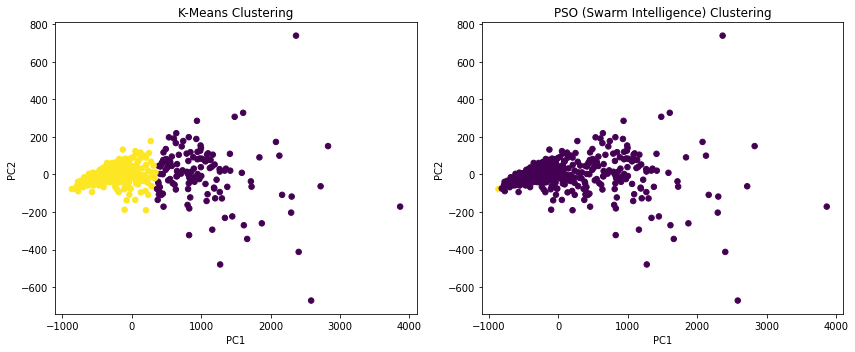

In [8]:
# ---------------------------
# Plotting the results
# ---------------------------
plt.figure(figsize=(12, 5))

# Plot k-means clustering results
plt.subplot(1, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.title("K-Means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot PSO clustering results
plt.subplot(1, 2, 2)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=pso_labels, cmap='viridis', s=30)
plt.title("PSO (Swarm Intelligence) Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()